In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Number of training samples: 50000
Number of testing samples: 10000
Training set shape: (32, 32, 3)
Testing set shape: (32, 32, 3)


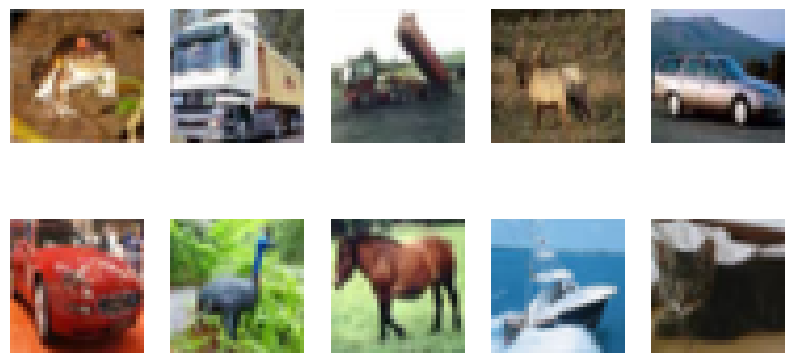

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

print("Number of training samples:", len(X_train))
print("Number of testing samples:", len(X_test))
print("Training set shape:", X_train[0].shape)
print("Testing set shape:", X_test[0].shape)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.axis("off")
plt.show()

In [3]:
# Normalization
X_train = X_train / 255
X_test = X_test / 255

# Building the model
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

# Compiling the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\jpark\OneDrive\Documents\Codes\python\Basic Classification and CNN\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Training the model
history = model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.3028 - loss: 1.9308 - val_accuracy: 0.4050 - val_loss: 1.6784
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4201 - loss: 1.6477 - val_accuracy: 0.4258 - val_loss: 1.6206
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.4532 - loss: 1.5538 - val_accuracy: 0.4737 - val_loss: 1.5033
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4744 - loss: 1.4892 - val_accuracy: 0.4483 - val_loss: 1.5787
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4859 - loss: 1.4518 - val_accuracy: 0.4725 - val_loss: 1.4750


In [5]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {accuracy * 100:2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4800 - loss: 1.4647
Test accuracy: 47.250000%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


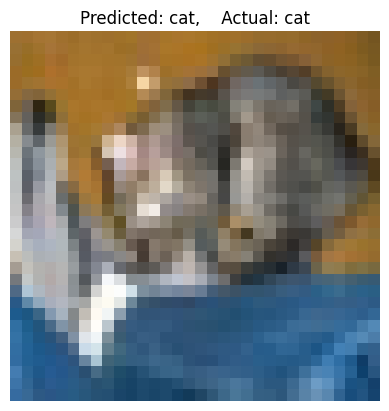

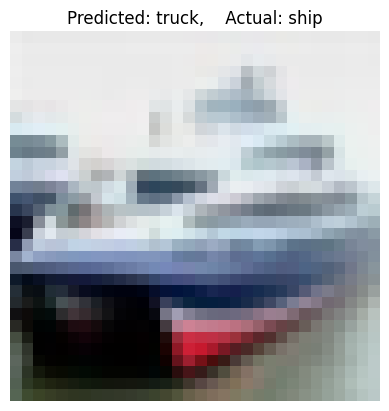

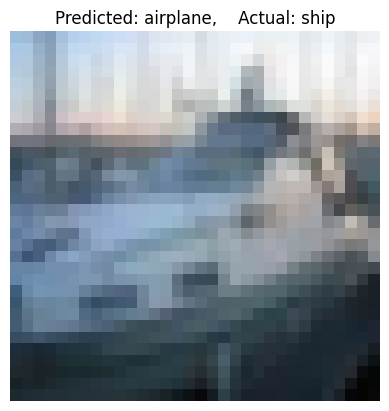

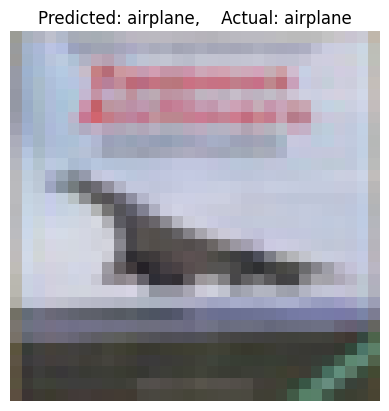

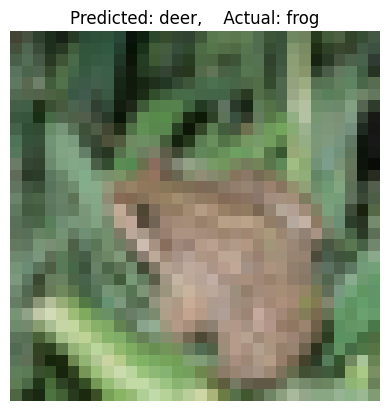

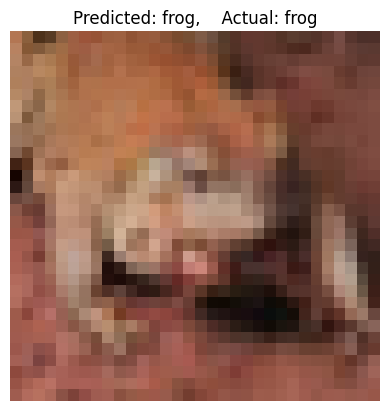

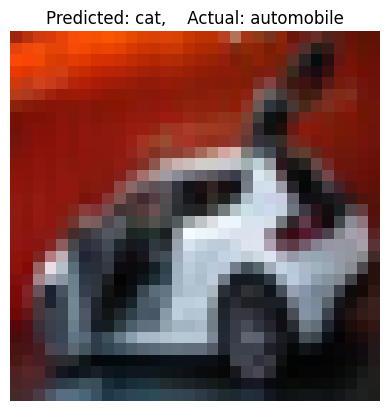

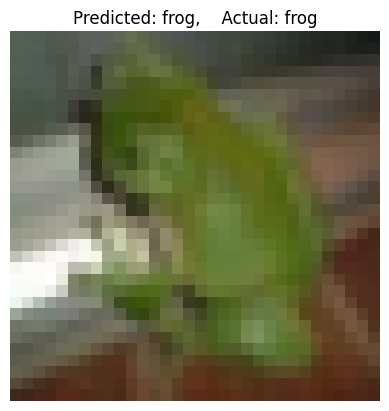

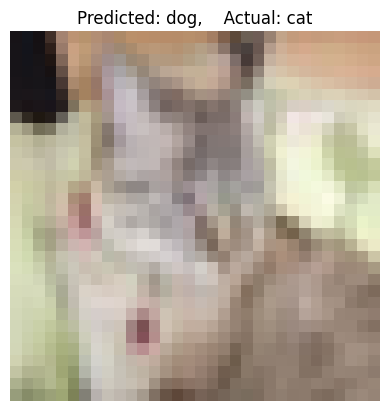

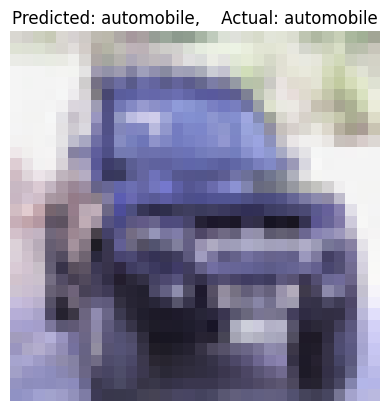

In [6]:
predictions = model.predict(X_test)
# predicted_labels = np.argmax(predictions, axis=1)\
Y_test = Y_test.reshape(-1,)    # reshape Y_test into 1D array since its not needed in model training anymore
predicted_classes = [np.argmax(element) for element in predictions]
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


for index in range(10):
    plt.imshow(X_test[index])
    plt.title(f"Predicted: {classes[predicted_classes[index]]},    Actual: {classes[Y_test[index]]}")
    plt.axis("off")
    plt.show()